<a href="https://colab.research.google.com/github/aliciasimmons/ASL-data-science-and-analytics/blob/main/Copy_of_11_9_1_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lesson 11.9.1 Activity

Customer Segmentation

You work for a large retailer that has collected customer data on sex, marital status, age, income, education, and occupation through a customer loyalty program.

The marketing department tasks you with defining groups of “similar” customers that it can use as the basis for new marketing campaigns.


In this module, we'll begin by clustering our customer data using K-Means.  We'll evaluate how many clusters of customers appear to be present in our dataset. 

#Step 1: Download and save the `segmentation data.csv` dataset from the class materials  

* Make a note of where you saved the file on your computer.

#Step 2: Upload the `segmentation data.csv` dataset by running the following code block 

* When prompted, navigate to and select the `segmentation data.csv` dataset where you saved it on your computer.

In [1]:
#Step 2

from google.colab import files
segmentation = files.upload()

Saving segmentation data.csv to segmentation data.csv


#Step 3: Import necessary packages

```
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import cluster, metrics
from sklearn import datasets
```

In [2]:
#Step 3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import cluster, metrics
from sklearn import datasets


# Step 4: Create a Pandas DataFrame from the CSV file
* Name the DataFrame `X`.
* Print the first five observations of `X`.  Note the kinds of data it contains.

In [5]:
#Step 4
X = pd.read_csv('segmentation data.csv')

X.head(5)







,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


#Step 5: Select Important Features
* Select the important features to be used in the clustering algorithm.  Hint: There is one feature that is probably *not* helpful and should be dropped.

In [6]:
#Step 5
categorical_cols = ['Sex','Marital status', 'Education', 'Occupation', 'Settlement size']

X = pd.get_dummies(X, columns = categorical_cols)


In [7]:
ss = StandardScaler()

X[['Age', 'Income']] = ss.fit_transform(X[['Age', 'Income']])

#Step 6: Pre-processing
* Just like supervised learning models, unsupervised learning models will work more accurately when quantitative data is scaled and categorical data is encoded.
*Which features of our dataset are quantitiative?  Which are categorical?


**Step 6 Answer:**


#Step 7: Pre-processing

* You can use the following code to one-hot-encode the categorical features:

```
categorical_cols = ['Sex','Marital status', 'Education', 'Occupation', 'Settlement size']

X = pd.get_dummies(X, columns = categorical_cols)
```

* You can use the following code to scale the quantitative features:

```
ss = StandardScaler()

X[['Age', 'Income']] = ss.fit_transform(X[['Age', 'Income']])
```

In [ ]:
#Step 7




#Step 8: Model the data using K-Means clustering with the default number of clusters (k = 8)
* Instantiate a K-Means model using `kmeans = cluster.KMeans()`
* Fit the K-Means model using `kmeans.fit(X)`

In [11]:
#Step 8
kmeans = cluster.KMeans(8)

kmeans.fit(X)


KMeans()

#Step 9: Plot the clusters
* We can't plot all of our features against the predicted clusters because there are just too many.  
* Run the following code block to create a scatterplot of each participant's age and income colored by the cluster they were assigned to.
* Remember that the clusters may appear to overlap because they are being separated by other features, like sex and marital status, that aren't being shown on the graph.
* What do you observe about how customers are being clustered?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


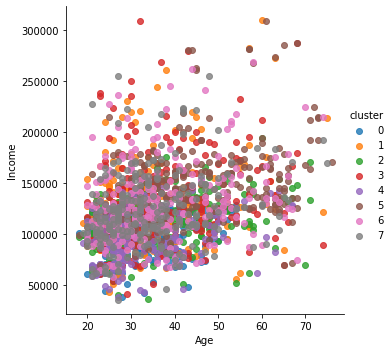

In [12]:
#Step 9

# labels_ are assigned to every observation based on the cluster the observation is assigned to
labels = pd.DataFrame(kmeans.labels_)

# cluster_centers_ give coordinated of the cluster centroid across every feature
labels.rename(columns={0: "cluster"}, inplace=True)

X_orig = pd.read_csv('segmentation data.csv')
graph = pd.concat([X_orig,labels], axis=1)

sns.lmplot('Age','Income', data=graph, hue='cluster', fit_reg=False)

**Step 9 Answer**


#Step 10: Choosing the optimal number of clusters
* Run the following code block to create an elbow plot of the inertia for the K-means algorithm for two to eight clusters.
* What cluster size appears to be the best?  Is it easy to tell from the elbow plot?


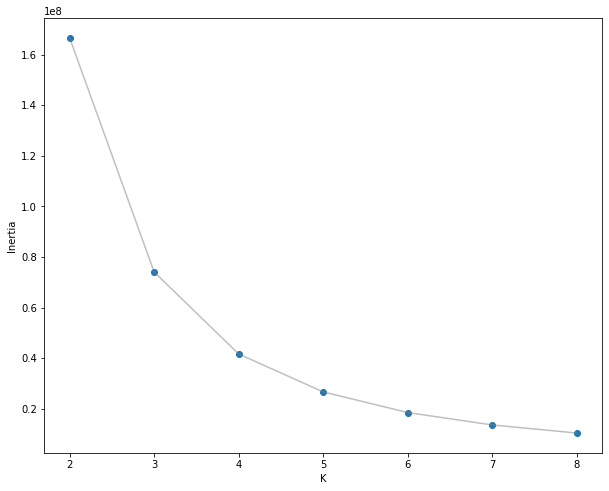

In [13]:
#Step 10

# get the interia_ attribute for K-means fit with increasing k
inertias = []
for k in [2,3,4,5,6,7,8]:
    km = cluster.KMeans(n_clusters=k)
    km.fit(X)
    inertias.append(km.inertia_)
    
# plot inertia for various k
fig, ax = plt.subplots(figsize=(10,8))
ax.plot([2,3,4,5,6,7,8], inertias, c='grey', alpha=0.5)
ax.scatter([2,3,4,5,6,7,8], inertias)
ax.set_xlabel('K')
ax.set_ylabel('Inertia')
plt.show()

**Step 10 Answer:**



#Step 11: Choosing the optimal number of clusters
* Run the following code block to plot the silhouette score for the K-means algorithm for two to eight clusters.  Remember that a higher silhouette score is better.
* What cluster size appears to be the best?  Is it easy to tell from this plot?


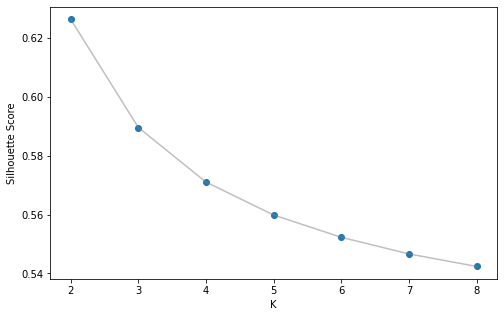

In [14]:
#Step 11

s_scores = []
for k in [2,3,4,5,6,7,8]:
    km = cluster.KMeans(n_clusters=k)
    km.fit(X)
    s_scores.append(metrics.silhouette_score(X, km.labels_, metric='euclidean'))
    
fig, ax = plt.subplots(figsize=(8,5))
ax.plot([2,3,4,5,6,7,8], s_scores, c='grey', alpha=0.5)
ax.scatter([2,3,4,5,6,7,8], s_scores)
ax.set_xlabel('K')
ax.set_ylabel('Silhouette Score')
plt.show()

**Step 11 Answer:**
